In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as scs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

In [2]:
df = pd.read_csv('data_correlation_gone.csv',index_col = 0)

In [3]:
check_col = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','distance_from_a_city']

In [4]:
def remove_outliers(df, col, threshold = 3):
    zscores = scs.zscore(df[col])
    indices = np.abs(np.where(zscores > threshold))
    return indices[0]


all_indices = []
for col in check_col:
    indices = remove_outliers(df, col, threshold = 3)
    all_indices.extend(indices)
all_indices = np.unique(all_indices)

In [5]:
df.reset_index(drop=True,inplace=True)

In [6]:
df.drop(all_indices,axis=0,inplace= True)

In [7]:
df = df.loc[df['condition']>=3]

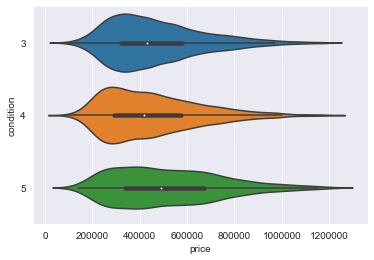

In [8]:
sns.violinplot(x='price', y='condition', data=df, orient='h')
plt.show()

In [9]:
df['cond3'] = df.condition.apply(lambda x: 1 if x ==3 else 0)
df['cond4'] = df.condition.apply(lambda x: 1 if x ==4 else 0)
df['cond5'] = df.condition.apply(lambda x: 1 if x ==5 else 0)

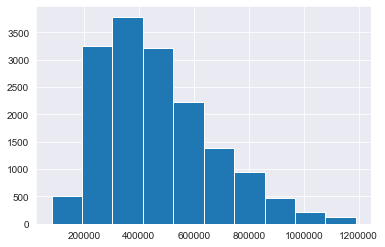

In [10]:
df['price'].hist()

In [13]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city','Age_of_House',
           'Years_last_renovation']

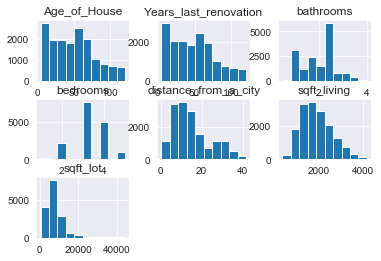

In [14]:
df[features].hist();

In [15]:
df.shape

(16151, 22)

In [16]:
tobox =['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city','Age_of_House',
           'Years_last_renovation']

In [17]:
for feat in tobox:
    df[feat],b = scs.boxcox(df[feat])


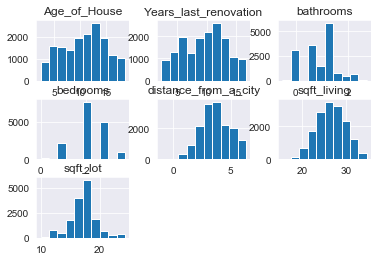

In [18]:
df[features].hist();

In [19]:
def norm_feat(series):
    return (series - series.mean())/series.std()

In [20]:
norm = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city','Age_of_House',
           'Years_last_renovation']


In [21]:
for feat in norm:
    df[feat] = norm_feat(df[feat])


In [22]:
# tomodel = ['distance_from_a_city','Years_last_renovation','sqft_living']

In [23]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode',
       'Age_of_House', 'Years_last_renovation', 'basement', 'biggerliving',
       'biggerlot', 'distance_from_a_city', 'distance_from_airport', 'cond3',
       'cond4', 'cond5'],
      dtype='object')

In [24]:
# x_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city',
#            'Age_of_House','basement','bedbath','grade']
# outcome = ['price']

In [25]:
x_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city',
           'basement','grade']
outcome = ['price']

In [26]:
# x_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city',
#            'basement', 'cond3',
#        'cond4', 'cond5']
# outcome = ['price']

In [27]:
X = df[x_cols]
y = df['price']

In [28]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.954
Method:                 Least Squares   F-statistic:                          4.741e+04
Date:                Wed, 03 Jun 2020   Prob (F-statistic):                        0.00
Time:                        21:18:58   Log-Likelihood:                     -2.1037e+05
No. Observations:               16151   AIC:                                  4.208e+05
Df Residuals:                   16144   BIC:                                  4.208e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.152e+04   1134.906    -10.154      0.000   -1.37e+04   -9299.848
bathrooms            -1052.6816   1329.168     -0.792      0.428   -3657.999    1552.636
sqft_living           8.843e+04   1514.484     58.387      0.000    8.55e+04    9.14e+04
sqft_lot              1.848e+04   1019.855     18.120      0.000    1.65e+04    2.05e+04
distance_from_a_city -1.154e+05    948.110   -121.681      0.000   -1.17e+05   -1.14e+05
basement             -1.908e+04   1847.717    -10.328      0.000   -2.27e+04   -1.55e+04
grade                 6.332e+04    144.325    438.705      0.000     6.3e+04    6.36e+04
==============================================================================
Omnibus:                      973.717   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1718.982
Skew:                           0.464   Prob(JB):                         0.00
Kurtosis:                       4.301   Cond. No.                         17.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

7 6
['bedrooms', 'sqft_living', 'sqft_lot', 'distance_from_a_city', 'basement']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
bedrooms,-1.152e+04,1134.906,-10.154,0.000,-1.37e+04,-9299.848
bathrooms,-1052.6816,1329.168,-0.792,0.428,-3657.999,1552.636
sqft_living,8.843e+04,1514.484,58.387,0.000,8.55e+04,9.14e+04
sqft_lot,1.848e+04,1019.855,18.120,0.000,1.65e+04,2.05e+04
distance_from_a_city,-1.154e+05,948.110,-121.681,0.000,-1.17e+05,-1.14e+05


In [30]:
X = df[x_cols]
y= df['price']

In [31]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.954
Method:                 Least Squares   F-statistic:                          5.532e+04
Date:                Wed, 03 Jun 2020   Prob (F-statistic):                        0.00
Time:                        21:19:00   Log-Likelihood:                     -2.1037e+05
No. Observations:               16151   AIC:                                  4.208e+05
Df Residuals:                   16145   BIC:                                  4.208e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms              -1.16e+04   1130.795    -10.259      0.000   -1.38e+04   -9384.212
sqft_living           8.765e+04   1150.751     76.164      0.000    8.54e+04    8.99e+04
sqft_lot              1.877e+04    954.278     19.664      0.000    1.69e+04    2.06e+04
distance_from_a_city -1.155e+05    940.221   -122.805      0.000   -1.17e+05   -1.14e+05
basement             -1.902e+04   1845.984    -10.304      0.000   -2.26e+04   -1.54e+04
grade                 6.331e+04    144.194    439.071      0.000     6.3e+04    6.36e+04
==============================================================================
Omnibus:                      975.095   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1720.177
Skew:                           0.465   Prob(JB):                         0.00
Kurtosis:                       4.300   Cond. No.                         16.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
# Your code here - Code a way to identify multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols,vif))

[('bedrooms', 1.712757215751729),
 ('sqft_living', 1.7737438291821168),
 ('sqft_lot', 1.2197698553346763),
 ('distance_from_a_city', 1.1840973618252462),
 ('basement', 1.6773811182595781),
 ('grade', 1.5908428910562806)]

In [33]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5.5]
print(len(vif_scores), len(x_cols))

6 6


In [34]:
X = df[x_cols]
y= df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.954
Method:                 Least Squares   F-statistic:                          5.532e+04
Date:                Wed, 03 Jun 2020   Prob (F-statistic):                        0.00
Time:                        21:19:01   Log-Likelihood:                     -2.1037e+05
No. Observations:               16151   AIC:                                  4.208e+05
Df Residuals:                   16145   BIC:                                  4.208e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms              -1.16e+04   1130.795    -10.259      0.000   -1.38e+04   -9384.212
sqft_living           8.765e+04   1150.751     76.164      0.000    8.54e+04    8.99e+04
sqft_lot              1.877e+04    954.278     19.664      0.000    1.69e+04    2.06e+04
distance_from_a_city -1.155e+05    940.221   -122.805      0.000   -1.17e+05   -1.14e+05
basement             -1.902e+04   1845.984    -10.304      0.000   -2.26e+04   -1.54e+04
grade                 6.331e+04    144.194    439.071      0.000     6.3e+04    6.36e+04
==============================================================================
Omnibus:                      975.095   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1720.177
Skew:                           0.465   Prob(JB):                         0.00
Kurtosis:                       4.300   Cond. No.                         16.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.954
Method:                 Least Squares   F-statistic:                          5.532e+04
Date:                Wed, 03 Jun 2020   Prob (F-statistic):                        0.00
Time:                        21:19:01   Log-Likelihood:                     -2.1037e+05
No. Observations:               16151   AIC:                                  4.208e+05
Df Residuals:                   16145   BIC:                                  4.208e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms              -1.16e+04   1130.795    -10.259      0.000   -1.38e+04   -9384.212
sqft_living           8.765e+04   1150.751     76.164      0.000    8.54e+04    8.99e+04
sqft_lot              1.877e+04    954.278     19.664      0.000    1.69e+04    2.06e+04
distance_from_a_city -1.155e+05    940.221   -122.805      0.000   -1.17e+05   -1.14e+05
basement             -1.902e+04   1845.984    -10.304      0.000   -2.26e+04   -1.54e+04
grade                 6.331e+04    144.194    439.071      0.000     6.3e+04    6.36e+04
==============================================================================
Omnibus:                      975.095   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1720.177
Skew:                           0.465   Prob(JB):                         0.00
Kurtosis:                       4.300   Cond. No.                         16.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

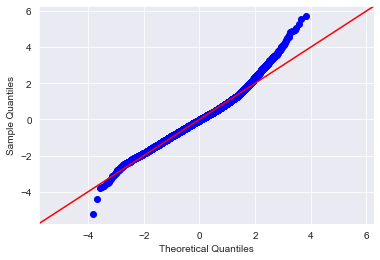

In [36]:
fig = sm.graphics.qqplot(model.resid, dist=scs.norm, line='45', fit=True)


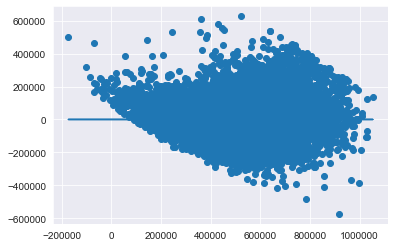

In [37]:
plt.scatter(model.predict(X), model.resid)
plt.plot(model.predict(X), [0 for i in range(len(df))])

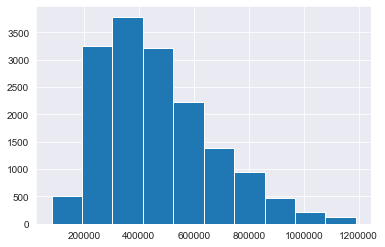

In [38]:
df.price.hist()

In [39]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.price.quantile(q=q)))

0.8 percentile: 630100.0
0.81 percentile: 641000.0
0.82 percentile: 650000.0
0.83 percentile: 664725.0
0.84 percentile: 675000.0
0.85 percentile: 689975.0
0.86 percentile: 700000.0
0.87 percentile: 715000.0
0.88 percentile: 729000.0
0.89 percentile: 745000.0
0.9 percentile: 760000.0
0.91 percentile: 775000.0
0.92 percentile: 795000.0
0.93 percentile: 814975.0
0.94 percentile: 835000.0
0.95 percentile: 860000.0
0.96 percentile: 894000.0
0.97 percentile: 930000.0
0.98 percentile: 975000.0
0.99 percentile: 1050000.0


In [40]:
orig_tot = len(df)
df = df[df.price < 970000.0] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df))/orig_tot)


Percent removed: 0.021360906445421338


In [41]:
X = df[x_cols]
y = df['price']

In [42]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                          5.806e+04
Date:                Wed, 03 Jun 2020   Prob (F-statistic):                        0.00
Time:                        21:19:06   Log-Likelihood:                     -2.0476e+05
No. Observations:               15806   AIC:                                  4.095e+05
Df Residuals:                   15800   BIC:                                  4.096e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.082e+04   1067.646    -10.134      0.000   -1.29e+04   -8727.109
sqft_living           8.027e+04   1096.303     73.221      0.000    7.81e+04    8.24e+04
sqft_lot              1.729e+04    900.136     19.205      0.000    1.55e+04    1.91e+04
distance_from_a_city -1.081e+05    896.471   -120.632      0.000    -1.1e+05   -1.06e+05
basement             -1.843e+04   1742.206    -10.580      0.000   -2.18e+04    -1.5e+04
grade                 6.245e+04    136.491    457.506      0.000    6.22e+04    6.27e+04
==============================================================================
Omnibus:                      414.677   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              589.009
Skew:                           0.290   Prob(JB):                    1.25e-128
Kurtosis:                       3.746   Cond. No.                         16.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

6 6
['bedrooms', 'sqft_living', 'sqft_lot', 'distance_from_a_city', 'basement']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
bedrooms,-1.082e+04,1067.646,-10.134,0.0,-1.29e+04,-8727.109
sqft_living,8.027e+04,1096.303,73.221,0.0,7.81e+04,8.24e+04
sqft_lot,1.729e+04,900.136,19.205,0.0,1.55e+04,1.91e+04
distance_from_a_city,-1.081e+05,896.471,-120.632,0.0,-1.1e+05,-1.06e+05
basement,-1.843e+04,1742.206,-10.580,0.0,-2.18e+04,-1.5e+04


In [44]:
X = df[x_cols]
y= df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                          5.806e+04
Date:                Wed, 03 Jun 2020   Prob (F-statistic):                        0.00
Time:                        21:19:07   Log-Likelihood:                     -2.0476e+05
No. Observations:               15806   AIC:                                  4.095e+05
Df Residuals:                   15800   BIC:                                  4.096e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.082e+04   1067.646    -10.134      0.000   -1.29e+04   -8727.109
sqft_living           8.027e+04   1096.303     73.221      0.000    7.81e+04    8.24e+04
sqft_lot              1.729e+04    900.136     19.205      0.000    1.55e+04    1.91e+04
distance_from_a_city -1.081e+05    896.471   -120.632      0.000    -1.1e+05   -1.06e+05
basement             -1.843e+04   1742.206    -10.580      0.000   -2.18e+04    -1.5e+04
grade                 6.245e+04    136.491    457.506      0.000    6.22e+04    6.27e+04
==============================================================================
Omnibus:                      414.677   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              589.009
Skew:                           0.290   Prob(JB):                    1.25e-128
Kurtosis:                       3.746   Cond. No.                         16.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
# Your code here - Code a way to identify multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols,vif))

[('bedrooms', 1.7134500855735522),
 ('sqft_living', 1.7654190933988807),
 ('sqft_lot', 1.224162039459947),
 ('distance_from_a_city', 1.1982413801399692),
 ('basement', 1.6673652234007144),
 ('grade', 1.59146418993663)]

In [46]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

6 6


In [47]:
X = df[x_cols]
y= df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                          5.806e+04
Date:                Wed, 03 Jun 2020   Prob (F-statistic):                        0.00
Time:                        21:19:09   Log-Likelihood:                     -2.0476e+05
No. Observations:               15806   AIC:                                  4.095e+05
Df Residuals:                   15800   BIC:                                  4.096e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.082e+04   1067.646    -10.134      0.000   -1.29e+04   -8727.109
sqft_living           8.027e+04   1096.303     73.221      0.000    7.81e+04    8.24e+04
sqft_lot              1.729e+04    900.136     19.205      0.000    1.55e+04    1.91e+04
distance_from_a_city -1.081e+05    896.471   -120.632      0.000    -1.1e+05   -1.06e+05
basement             -1.843e+04   1742.206    -10.580      0.000   -2.18e+04    -1.5e+04
grade                 6.245e+04    136.491    457.506      0.000    6.22e+04    6.27e+04
==============================================================================
Omnibus:                      414.677   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              589.009
Skew:                           0.290   Prob(JB):                    1.25e-128
Kurtosis:                       3.746   Cond. No.                         16.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

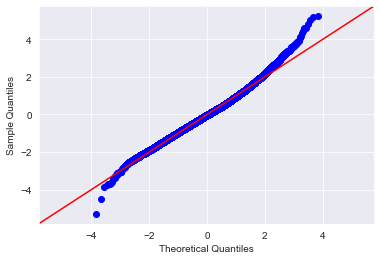

In [48]:
fig = sm.graphics.qqplot(model.resid, dist=scs.norm, line='45', fit=True)


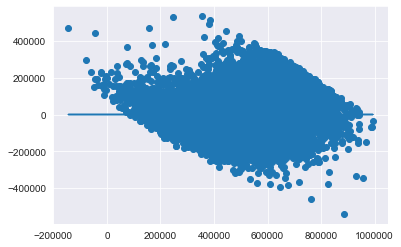

In [49]:
plt.scatter(model.predict(X), model.resid)
plt.plot(model.predict(X), [0 for i in range(len(df))])

0.8 percentile: 615000.0
0.81 percentile: 625000.0
0.82 percentile: 635000.0
0.83 percentile: 645000.0
0.84 percentile: 654000.0
0.85 percentile: 665000.0
0.86 percentile: 677219.9999999998
0.87 percentile: 690000.0
0.88 percentile: 700000.0
0.89 percentile: 716045.0
0.9 percentile: 730000.0
0.91 percentile: 746775.0000000005
0.92 percentile: 760000.0
0.93 percentile: 775932.5
0.94 percentile: 795000.0
0.95 percentile: 813000.0
0.96 percentile: 835000.0
0.97 percentile: 857473.9000000001
0.98 percentile: 889995.0
0.99 percentile: 925000.0


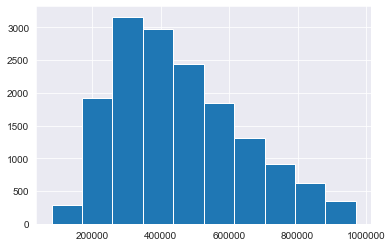

In [50]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.price.quantile(q=q)))

df.price.hist()

In [51]:
df = df[df.price <= 900000.0]


In [52]:
X =df[x_cols]
y=df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                          5.779e+04
Date:                Wed, 03 Jun 2020   Prob (F-statistic):                        0.00
Time:                        21:19:13   Log-Likelihood:                     -2.0112e+05
No. Observations:               15557   AIC:                                  4.022e+05
Df Residuals:                   15551   BIC:                                  4.023e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.036e+04   1050.296     -9.862      0.000   -1.24e+04   -8299.613
sqft_living           7.621e+04   1087.905     70.055      0.000    7.41e+04    7.83e+04
sqft_lot              1.676e+04    884.591     18.949      0.000     1.5e+04    1.85e+04
distance_from_a_city -1.045e+05    887.080   -117.855      0.000   -1.06e+05   -1.03e+05
basement             -1.656e+04   1713.744     -9.663      0.000   -1.99e+04   -1.32e+04
grade                  6.19e+04    134.884    458.945      0.000    6.16e+04    6.22e+04
==============================================================================
Omnibus:                      364.620   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              512.030
Skew:                           0.270   Prob(JB):                    6.52e-112
Kurtosis:                       3.706   Cond. No.                         16.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

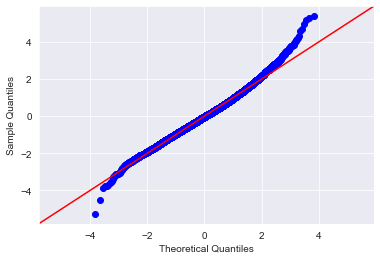

In [53]:
fig = sm.graphics.qqplot(model.resid, dist=scs.norm, line='45', fit=True)


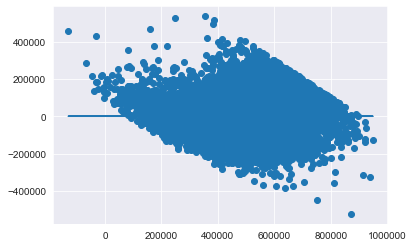

In [54]:
plt.scatter(model.predict(X), model.resid)
plt.plot(model.predict(X), [0 for i in range(len(df))])

In [55]:
def plot_residuals(resids):
    plt.hist(resids)
    plt.title("Residuals")
    plt.show()
    
    xspace = np.linspace(0, 1, len(resids))
    plt.scatter(xspace, resids)
    plt.title("resids")
    plt.hlines(0, xmin=0, xmax=1)
    plt.show()

In [56]:
residuals = model.resid

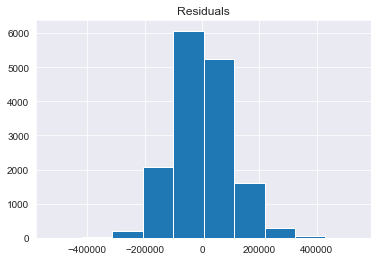

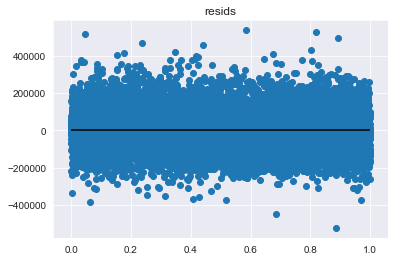

In [57]:
plot_residuals(residuals)

In [58]:
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score

In [59]:
ols = LinearRegression(fit_intercept=False, normalize=False, n_jobs=-1)

In [63]:
cv5_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=5, n_jobs=-1) )
cv10_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=10, n_jobs=-1) )
cv20_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=20, n_jobs=-1) )

# cv breaks your data into that many equal pieces 
cv5_scores,cv10_scores,cv20_scores

(0.677610085537568, 0.6752748115397723, 0.6764714289152034)

In [64]:
cv5mse_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_squared_error', cv=5, n_jobs=-1) )
cv10mse_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_squared_error', cv=10, n_jobs=-1) )
cv20mse_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_squared_error', cv=20, n_jobs=-1) )

# cv breaks your data into that many equal pieces 
cv5mse_scores,cv10mse_scores,cv20mse_scores

(-9982720693.312477, -9996766611.11275, -9954292390.987682)

In [65]:
cv5mae_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1) )
cv10mae_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_absolute_error', cv=10, n_jobs=-1) )
cv20mae_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_absolute_error', cv=20, n_jobs=-1) )

# cv breaks your data into that many equal pieces 
cv5mae_scores,cv10mae_scores,cv20mae_scores

(-77730.43751332958, -77773.47678796409, -77616.91848875335)

In [66]:
def make_ols_sklearn(X, y, test_size=0.20, fit_intercept=False, standardize=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    if standardize:
        ss = StandardScaler()
        ss.fit(X_train)
        X_train = ss.transform(X_train)
        X_test = ss.transform(X_test)
    ols = LinearRegression(fit_intercept=fit_intercept, normalize=False)
    ols.fit(X_train, y_train)
    train_score = ols.score(X_train, y_train)
    test_score = ols.score(X_test, y_test)
    cv5_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=5, n_jobs=-1) )
    cv10_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=10, n_jobs=-1) )
    cvmse_5 = np.mean(cross_val_score(ols,X , y, cv=5, scoring='neg_mean_squared_error'))
    cvmse_10 = np.mean(cross_val_score(ols,X, y, cv=10, scoring='neg_mean_squared_error'))
    print(f"train R2 score = {train_score}")
    print(f"test R2 score = {test_score}")
    print(f"cv5 R2 score = {cv5_scores}")
    print(f"cv10 R2 score = {cv10_scores}")
    print(f"cv5 MSE score = {cvmse_5}")
    print(f"cv10  MSE score = {cvmse_10}")

    return ols

In [67]:
make_ols_sklearn(X, y)

train R2 score = 0.6806121429530017
test R2 score = 0.6826447509945388
cv5 R2 score = 0.677610085537568
cv10 R2 score = 0.6752748115397723
cv5 MSE score = -9982720693.312475
cv10  MSE score = -9996766611.112745


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [68]:
make_ols_sklearn(X, y)

train R2 score = 0.6773382617420869
test R2 score = 0.6952673541057499
cv5 R2 score = 0.677610085537568
cv10 R2 score = 0.6752748115397723
cv5 MSE score = -9982720693.312475
cv10  MSE score = -9996766611.112745


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [69]:
residuals = model.resid

In [70]:
resid = pd.DataFrame(df['price'])

In [71]:
resid['residuals']  = residuals

In [72]:
resid

,price,residuals
0,538000.0,37356.025565
1,180000.0,-45833.652466
2,604000.0,156144.919586
3,510000.0,5735.672326
4,257500.0,7169.985816
...,...,...
17201,475000.0,-10835.077976
17202,360000.0,-104048.267900
17203,400000.0,-159370.966065
17204,402101.0,-99480.814699


In [73]:
import seaborn as sns

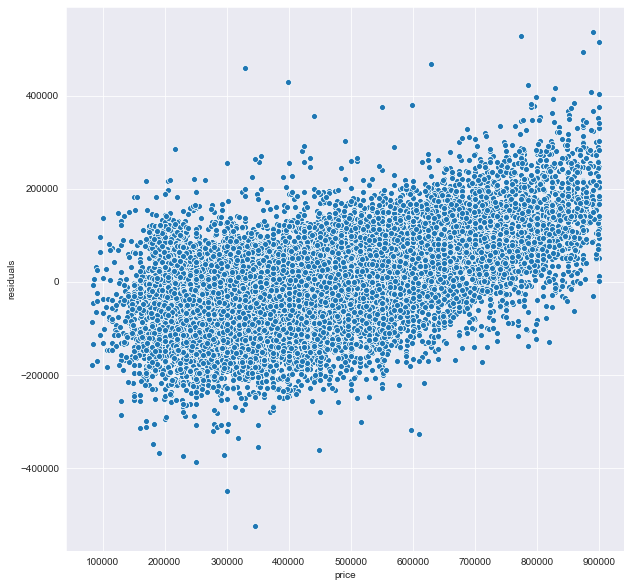

In [74]:
plt.figure(figsize= (10,10))

sns.scatterplot(y='residuals',x='price',data=resid)